###  selective search를 이용하여 Object Detection을 위한 Region Proposal 영역을 도출

#### selectivesearch를 설치하고 이미지를 로드

In [1]:
!pip install selectivesearch

  Preparing metadata (setup.py) ... done
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4335 sha256=3accffacecbf5a0656a790a99a6fe1fab57ee8dcddcd5135a215c8992c502dc9
  Stored in directory: /root/.cache/pip/wheels/0e/49/95/01447a4e0f48a135ac91fbdb1dd2a1c0523e40e29957b383a3
Successfully built selectivesearch


In [2]:
!mkdir /content/data

img shape: (3562, 2545, 3)


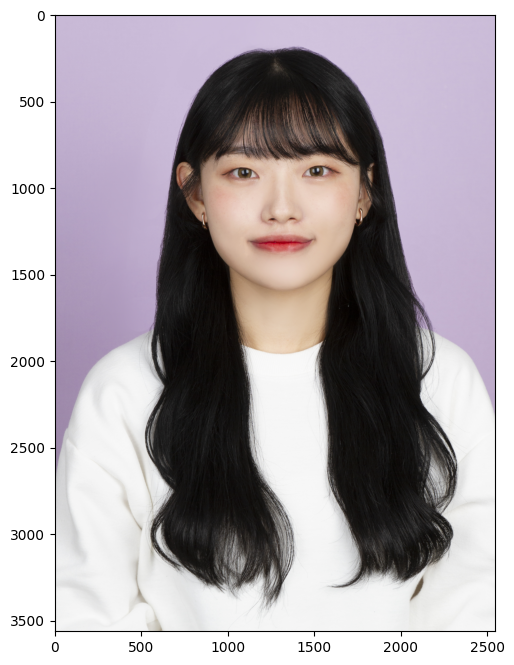

In [3]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

### 오드리헵번 이미지를 cv2로 로드하고 matplotlib으로 시각화
img = cv2.imread('./data/picture.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [4]:
import selectivesearch

#selectivesearch.selective_search()는 이미지의 Region Proposal정보를 반환
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000) # 첫번째 튜플은 중요하지 않아서 언더바

print(type(regions), len(regions))

<class 'list'> 409


#### 반환된 Region Proposal(후보 영역)에 대한 정보 보기.
반환된 regions 변수는 리스트 타입으로 세부 원소로 딕셔너리를 가지고 있음.
개별 딕셔너리내 KEY값별 의미
* rect 키값은 x,y 시작 좌표와 너비, 높이 값을 가지며 이 값이 Detected Object 후보를 나타내는 Bounding box임.
* size는 segment로 select된 Object의 크기
* labels는 해당 rect로 지정된 Bounding Box내에 있는 오브젝트들의 고유 ID
* 아래로 내려갈 수록 너비와 높이 값이 큰 Bounding box이며 하나의 Bounding box에 여러개의 오브젝트가 있을 확률이 커짐.

In [5]:
regions

[{'rect': (0, 0, 2544, 2440), 'size': 2850497, 'labels': [0.0]},
 {'rect': (687, 187, 963, 764), 'size': 245072, 'labels': [1.0]},
 {'rect': (798, 206, 458, 431), 'size': 40236, 'labels': [2.0]},
 {'rect': (1229, 233, 114, 117), 'size': 5375, 'labels': [3.0]},
 {'rect': (1580, 276, 423, 1095), 'size': 42993, 'labels': [4.0]},
 {'rect': (1527, 330, 198, 208), 'size': 8039, 'labels': [5.0]},
 {'rect': (942, 393, 120, 153), 'size': 4151, 'labels': [6.0]},
 {'rect': (1635, 394, 105, 128), 'size': 3162, 'labels': [7.0]},
 {'rect': (1567, 413, 133, 132), 'size': 3879, 'labels': [8.0]},
 {'rect': (1350, 439, 144, 315), 'size': 17125, 'labels': [9.0]},
 {'rect': (1655, 440, 254, 641), 'size': 63413, 'labels': [10.0]},
 {'rect': (1207, 454, 138, 280), 'size': 17848, 'labels': [11.0]},
 {'rect': (1471, 472, 146, 285), 'size': 8039, 'labels': [12.0]},
 {'rect': (870, 475, 233, 239), 'size': 17576, 'labels': [13.0]},
 {'rect': (1569, 478, 138, 269), 'size': 13094, 'labels': [14.0]},
 {'rect': (115

'rect': (166, 23, 87, 176) /  'size': 8639 / 'labels': [4.0]
rect 는 바운딩 박스 사이즈이다.

In [6]:
# rect정보만 출력해서 보기
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)
print(len(cand_rects))

[(0, 0, 2544, 2440), (687, 187, 963, 764), (798, 206, 458, 431), (1229, 233, 114, 117), (1580, 276, 423, 1095), (1527, 330, 198, 208), (942, 393, 120, 153), (1635, 394, 105, 128), (1567, 413, 133, 132), (1350, 439, 144, 315), (1655, 440, 254, 641), (1207, 454, 138, 280), (1471, 472, 146, 285), (870, 475, 233, 239), (1569, 478, 138, 269), (1156, 483, 55, 126), (1531, 493, 101, 236), (1108, 539, 52, 182), (989, 542, 139, 246), (697, 544, 75, 224), (1391, 562, 79, 201), (1264, 565, 114, 236), (1522, 567, 55, 175), (1152, 571, 87, 223), (1423, 571, 321, 290), (913, 580, 178, 258), (1604, 611, 96, 185), (1093, 614, 79, 219), (1491, 621, 70, 137), (859, 629, 155, 213), (1236, 629, 70, 133), (1341, 635, 99, 139), (1208, 649, 115, 186), (1333, 684, 191, 158), (1681, 692, 80, 172), (663, 704, 59, 328), (1147, 733, 118, 98), (1255, 736, 143, 100), (838, 770, 904, 859), (831, 786, 107, 154), (1327, 796, 346, 192), (880, 805, 858, 777), (701, 851, 96, 147), (1746, 858, 68, 180), (1514, 867, 143, 7

**bounding box를 시각화 하기**

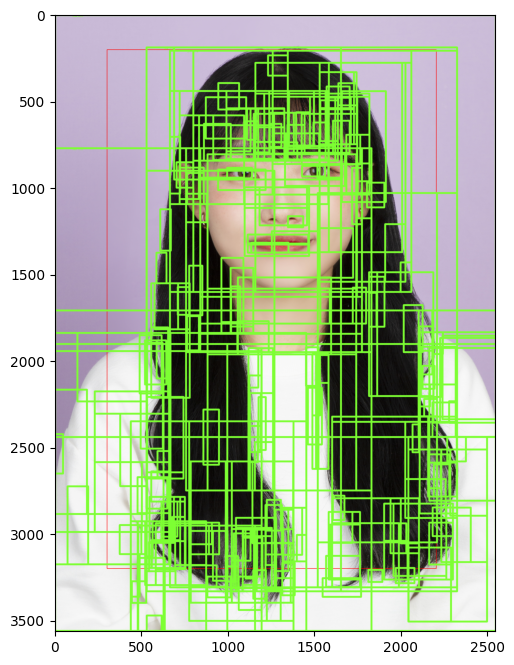

In [31]:
# opencv의 rectangle()을 이용하여 시각화
# rectangle()은 이미지와 좌상단 좌표, 우하단 좌표, box컬러색, 두께등을 인자로 입력하면 원본 이미지에 box를 그려줌.

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects: # 41개의 튜플들

    left = rect[0]
    top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함.
    right = left + rect[2]
    bottom = top + rect[3]

    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=10) # 사각형을 그려줌

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

#### bounding box의 크기가 큰 후보만 추출

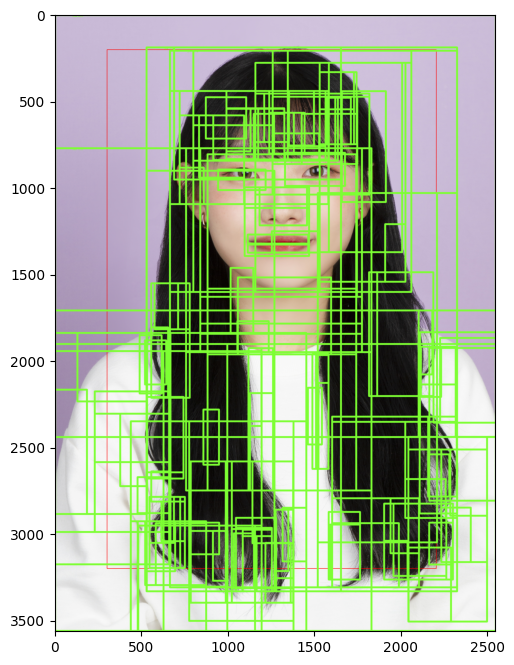

In [32]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000] #만 이상인 것만 추출

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:

    left = rect[0]
    top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함.
    right = left + rect[2]
    bottom = top + rect[3]

    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=10)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

### IOU 구하기

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 입력인자로 후보 박스와 실제 박스를 받아서 IOU를 계산하는 함수 생성

## iou 함수

In [33]:
import numpy as np

def compute_iou(cand_box, gt_box):

    # Calculate intersection areas
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])

    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)

    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection

    iou = intersection / union
    return iou

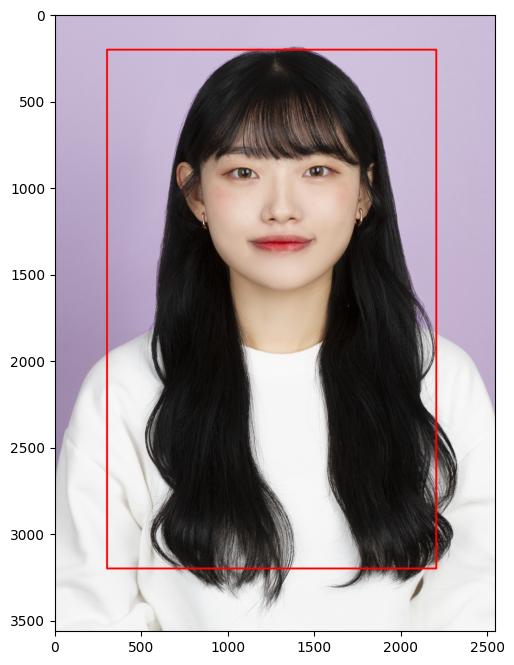

In [34]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 실제 box(Ground Truth)의 좌표를 아래와 같다고 가정.
gt_box = [300, 200, 2200, 3200]


img = cv2.imread('./data/picture.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0 , 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=10)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [35]:
import selectivesearch

#selectivesearch.selective_search()는 이미지의 Region Proposal정보를 반환
img = cv2.imread('./data/picture.jpg')
img_rgb2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
_, regions = selectivesearch.selective_search(img_rgb2, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 409


In [36]:
[cand['rect'] for cand in regions]

[(0, 0, 2544, 2440),
 (687, 187, 963, 764),
 (798, 206, 458, 431),
 (1229, 233, 114, 117),
 (1580, 276, 423, 1095),
 (1527, 330, 198, 208),
 (942, 393, 120, 153),
 (1635, 394, 105, 128),
 (1567, 413, 133, 132),
 (1350, 439, 144, 315),
 (1655, 440, 254, 641),
 (1207, 454, 138, 280),
 (1471, 472, 146, 285),
 (870, 475, 233, 239),
 (1569, 478, 138, 269),
 (1156, 483, 55, 126),
 (1531, 493, 101, 236),
 (1108, 539, 52, 182),
 (989, 542, 139, 246),
 (697, 544, 75, 224),
 (1391, 562, 79, 201),
 (1264, 565, 114, 236),
 (1522, 567, 55, 175),
 (1152, 571, 87, 223),
 (1423, 571, 321, 290),
 (913, 580, 178, 258),
 (1604, 611, 96, 185),
 (1093, 614, 79, 219),
 (1491, 621, 70, 137),
 (859, 629, 155, 213),
 (1236, 629, 70, 133),
 (1341, 635, 99, 139),
 (1208, 649, 115, 186),
 (1333, 684, 191, 158),
 (1681, 692, 80, 172),
 (663, 704, 59, 328),
 (1147, 733, 118, 98),
 (1255, 736, 143, 100),
 (838, 770, 904, 859),
 (831, 786, 107, 154),
 (1327, 796, 346, 192),
 (880, 805, 858, 777),
 (701, 851, 96, 147)

In [37]:
cand_rects = [cand['rect'] for cand in regions]
for index, cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]

    iou = compute_iou(cand_box, gt_box)
    print('index:', index, "iou:", iou)

index: 0 iou: 0.5562409819953577
index: 1 iou: 0.12660141699309885
index: 2 iou: 0.03463122807017544
index: 3 iou: 0.00234
index: 4 iou: 0.08126052631578948
index: 5 iou: 0.007225263157894737
index: 6 iou: 0.0032210526315789474
index: 7 iou: 0.0023578947368421053
index: 8 iou: 0.00308
index: 9 iou: 0.007957894736842105
index: 10 iou: 0.028563859649122808
index: 11 iou: 0.006778947368421053
index: 12 iou: 0.0073
index: 13 iou: 0.009769649122807018
index: 14 iou: 0.006512631578947369
index: 15 iou: 0.0012157894736842105
index: 16 iou: 0.004181754385964912
index: 17 iou: 0.0016603508771929824
index: 18 iou: 0.0059989473684210525
index: 19 iou: 0.0029473684210526317
index: 20 iou: 0.0027857894736842107
index: 21 iou: 0.00472
index: 22 iou: 0.0016885964912280703
index: 23 iou: 0.0034036842105263157
index: 24 iou: 0.016331578947368423
index: 25 iou: 0.008056842105263157
index: 26 iou: 0.0031157894736842107
index: 27 iou: 0.0030352631578947366
index: 28 iou: 0.0016824561403508771
index: 29 io

In [38]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 5000]
cand_rects.sort()
cand_rects

[(0, 0, 2544, 2440),
 (0, 0, 2544, 2440),
 (0, 0, 2544, 3561),
 (0, 0, 2544, 3561),
 (0, 0, 2544, 3561),
 (0, 770, 1826, 2791),
 (0, 770, 1826, 2791),
 (0, 770, 1826, 2791),
 (0, 1708, 2544, 1853),
 (0, 1708, 2544, 1853),
 (0, 1708, 2544, 1853),
 (0, 1708, 2544, 1853),
 (0, 1708, 2544, 1853),
 (0, 1838, 531, 1047),
 (0, 1838, 658, 1151),
 (0, 1838, 658, 1151),
 (0, 1838, 658, 1338),
 (0, 1838, 658, 1338),
 (0, 1838, 666, 1338),
 (0, 1838, 666, 1338),
 (0, 1838, 666, 1338),
 (0, 1838, 1450, 1723),
 (0, 1902, 2544, 1659),
 (0, 1902, 2544, 1659),
 (0, 1902, 2544, 1659),
 (0, 1902, 2544, 1659),
 (0, 1902, 2544, 1659),
 (0, 1943, 626, 1618),
 (0, 1943, 1192, 1618),
 (0, 2166, 184, 719),
 (0, 2423, 46, 228),
 (72, 2725, 119, 451),
 (129, 1838, 402, 396),
 (229, 2176, 429, 813),
 (229, 2305, 429, 684),
 (229, 2585, 272, 404),
 (229, 2585, 429, 404),
 (373, 2949, 125, 168),
 (376, 2305, 155, 419),
 (437, 2349, 939, 1212),
 (437, 2349, 939, 1212),
 (437, 2349, 1013, 1212),
 (437, 2349, 1013, 12

img shape: (3562, 2545, 3)
index: 0 iou: 0.5562409819953577 rectangle: (0, 0, 2544, 2440)
index: 338 iou: 0.5741391750203405 rectangle: (528, 187, 1650, 3332)
index: 365 iou: 0.5231493643084423 rectangle: (0, 770, 1826, 3561)
index: 369 iou: 0.5741391750203405 rectangle: (528, 187, 1650, 3332)
index: 371 iou: 0.7374770689176882 rectangle: (663, 206, 2320, 3309)
index: 372 iou: 0.7936909795184688 rectangle: (528, 187, 2320, 3332)
index: 373 iou: 0.5562409819953577 rectangle: (0, 0, 2544, 2440)
index: 375 iou: 0.7936909795184688 rectangle: (528, 187, 2320, 3332)
index: 378 iou: 0.5231493643084423 rectangle: (0, 770, 1826, 3561)
index: 379 iou: 0.7936909795184688 rectangle: (528, 187, 2320, 3332)
index: 380 iou: 0.5231493643084423 rectangle: (0, 770, 1826, 3561)
index: 382 iou: 0.6291957421330663 rectangle: (0, 0, 2544, 3561)
index: 383 iou: 0.6291957421330663 rectangle: (0, 0, 2544, 3561)
index: 384 iou: 0.6291957421330663 rectangle: (0, 0, 2544, 3561)


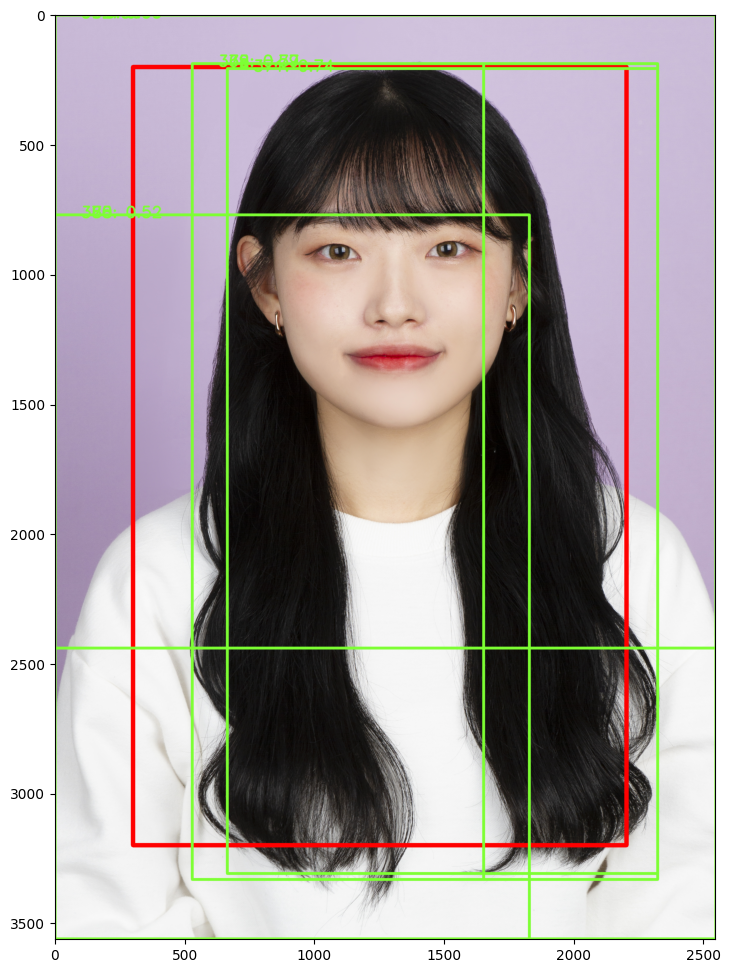

In [42]:
img = cv2.imread('./data/picture.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

green_rgb = (125, 255, 51)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 3000]
gt_box = [300, 200, 2200, 3200]
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=15)

for index, cand_box in enumerate(cand_rects):

    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]

    iou = compute_iou(cand_box, gt_box)

    if iou > 0.5:
        print('index:', index, "iou:", iou, 'rectangle:',(cand_box[0], cand_box[1], cand_box[2], cand_box[3]) )
        cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_rgb, thickness=10)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 2, color=green_rgb, thickness=5)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()
